In [1]:
import pandas as pd
import numpy as np
import os, sys, glob
from tqdm import tqdm
import datetime as dt
import matplotlib.pyplot as plt

# Join Tables

In [2]:
df_citi = pd.read_csv('/Users/graceli/Documents/Baruch MSBA/S3/BUS9430/Data/FinalData/citi_df.csv')
df_weather = pd.read_csv('/Users/graceli/Documents/Baruch MSBA/S3/BUS9430/Data/FinalData/Weather.csv')
df_subway = pd.read_csv('/Users/graceli/Documents/Baruch MSBA/S3/BUS9430/Data/FinalData/Subway.csv')
df_event = pd.read_csv('/Users/graceli/Documents/Baruch MSBA/S3/BUS9430/Data/FinalData/Events_updated_v2.csv')
df_traffic = pd.read_csv('/Users/graceli/Documents/Baruch MSBA/S3/BUS9430/Data/FinalData/Traffic.csv')
df_theater = pd.read_csv('/Users/graceli/Documents/Baruch MSBA/S3/BUS9430/Data/FinalData/Theater.csv')

# df_subway.head()

In [3]:
df_citi.shape

(2973762, 7)

In [4]:
df_citi.head()

,Unnamed: 0,DateTime,Zipcode,StationID,BikeCount,Month,Hour
0,0,2017-01-01 00,10000,387,3,January,0
1,1,2017-01-01 00,10001,3259,2,January,0
2,2,2017-01-01 00,10001,388,2,January,0
3,3,2017-01-01 00,10001,442,3,January,0
4,4,2017-01-01 00,10001,466,1,January,0


In [ ]:
# df_citi.(['DateTime', 'Zipcode', 'Month','Hour']).agg({'BikeCount': ['sum']})

In [ ]:
# df2_citi = df_citi.groupby(['DateTime', 'Zipcode']).agg({'BikeCount': ['sum']})
# df2_citi = df2_citi.reset_index()
# df2_citi.shape

In [5]:
df_citi['DateTime']=df_citi['DateTime'].str.slice(0, 10)
df_citi['Zipcode'] = df_citi['Zipcode'].apply(lambda x: x.split('-')[0] if '-' in x else x)
df_citi['Zipcode'] = df_citi['Zipcode'].apply(lambda x: x[0] + x[2:] if len(x) ==6 else x)
df1_citi = df_citi.groupby(['DateTime', 'Zipcode', 'Month','Hour']).agg({'BikeCount': ['sum']})
df1_citi = df1_citi.reset_index()

# df1_citi['Month'] = df_citi['DateTime'].str.slice(5, 7)
df1_citi.head()

,DateTime,Zipcode,Month,Hour,BikeCount
,,,,,sum
0,2017-01-01,10000,January,0,3
1,2017-01-01,10000,January,1,8
2,2017-01-01,10000,January,2,2
3,2017-01-01,10000,January,4,1
4,2017-01-01,10000,January,5,1


In [ ]:
# df_citi['DateTime']=df_citi['DateTime'].str.slice(0, 10)
# df_citi['Zipcode'] = df_citi['Zipcode'].apply(lambda x: x.split('-')[0] if '-' in x else x)
# df_citi['Zipcode'] = df_citi['Zipcode'].apply(lambda x: x[0] + x[2:] if len(x) ==6 else x)
# df3_citi = df_citi.groupby(['DateTime', 'Zipcode', 'Month','Hour']).agg({'BikeCount': ['sum']})
# df3_citi = df3_citi.reset_index()
# # df3_citi.loc[df3_citi.iloc[:,0:4].duplicated(),]
# df3_citi.shape

In [6]:
df_wrongZipcode = df1_citi.loc[df1_citi['Zipcode'].str.len()>5,:]
df_wrongZipcode['Zipcode'].unique()

array([], dtype=object)

In [7]:
df1_citi['DateTime'] = pd.to_datetime(df1_citi['DateTime'], format='%Y-%m-%d')
df1_citi.dtypes

DateTime          datetime64[ns]
Zipcode                   object
Month                     object
Hour                       int64
BikeCount  sum             int64
dtype: object

## Create 'day of week' and 'Is_Holiday' variables

In [8]:
df1_citi['DayOfWeek'] = df1_citi['DateTime'].dt.day_name()
df1_citi.head()

,DateTime,Zipcode,Month,Hour,BikeCount,DayOfWeek
,,,,,sum,
0,2017-01-01,10000,January,0,3,Sunday
1,2017-01-01,10000,January,1,8,Sunday
2,2017-01-01,10000,January,2,2,Sunday
3,2017-01-01,10000,January,4,1,Sunday
4,2017-01-01,10000,January,5,1,Sunday


In [9]:
from datetime import date

import holidays

us_holidays = holidays.CountryHoliday('US', prov=None, state='NY',years=[2017])

In [10]:
df1_citi['Holiday'] = df1_citi['DateTime'].isin(us_holidays)
df1_citi.head()

,DateTime,Zipcode,Month,Hour,BikeCount,DayOfWeek,Holiday
,,,,,sum,,
0,2017-01-01,10000,January,0,3,Sunday,True
1,2017-01-01,10000,January,1,8,Sunday,True
2,2017-01-01,10000,January,2,2,Sunday,True
3,2017-01-01,10000,January,4,1,Sunday,True
4,2017-01-01,10000,January,5,1,Sunday,True


In [11]:
df1_citi.columns = df1_citi.columns.droplevel(1)
df1_citi.columns

Index(['DateTime', 'Zipcode', 'Month', 'Hour', 'BikeCount', 'DayOfWeek',
       'Holiday'],
      dtype='object')

In [12]:
df_weather = df_weather.loc[:,['temp','feels_like','pressure','humidity',
                               'wind_speed','weather_main','weather_description',
                               'date_ET','time_ET']]
df_weather.head()

,temp,feels_like,pressure,humidity,wind_speed,weather_main,weather_description,date_ET,time_ET
0,44.37,35.69,1013,52,8.05,Clouds,overcast clouds,2017-01-01,00:00:00
1,44.64,35.49,1013,54,9.17,Clouds,overcast clouds,2017-01-01,01:00:00
2,44.11,34.90,1013,54,9.17,Clouds,overcast clouds,2017-01-01,02:00:00
3,44.22,35.47,1013,51,8.05,Clouds,scattered clouds,2017-01-01,03:00:00
4,43.47,33.42,1014,52,10.29,Clear,sky is clear,2017-01-01,04:00:00


In [13]:
df_weather['time_ET']=df_weather['time_ET'].str.slice(0, 2)
df_weather['time_ET']=df_weather['time_ET'].astype(int)

In [14]:
df_weather['date_ET']=pd.to_datetime(df_weather['date_ET'], format='%Y-%m-%d')

In [15]:
df_citiWeather = pd.merge(df1_citi, df_weather,  how='left', left_on=['DateTime','Hour'], right_on = ['date_ET','time_ET'])


In [16]:
df_citiWeather.columns

Index(['DateTime', 'Zipcode', 'Month', 'Hour', 'BikeCount', 'DayOfWeek',
       'Holiday', 'temp', 'feels_like', 'pressure', 'humidity', 'wind_speed',
       'weather_main', 'weather_description', 'date_ET', 'time_ET'],
      dtype='object')

In [17]:
df_citiWeather=df_citiWeather.drop(['date_ET', 'time_ET'], axis=1)

In [18]:
df_subway['Zipcode'] = df_subway['Zipcode'].str.slice(0,5)
df_subway = df_subway.groupby(['Zipcode']).agg({'Objectid': ['count']})
df1_subway = df_subway.reset_index()
df1_subway.columns = df1_subway.columns.droplevel(1)

df1_subway.head()

,Zipcode,Objectid
0,10000,5
1,10001,43
2,10002,18
3,10003,26
4,10004,5


In [19]:
df_citiWeatherSub = pd.merge(df_citiWeather,df1_subway, how = 'left',left_on = ['Zipcode'],right_on=['Zipcode'])
df_citiWeatherSub = df_citiWeatherSub.rename(columns={"Objectid":"SubwayEntranceCount"})
df_citiWeatherSub.head()

,DateTime,Zipcode,Month,Hour,BikeCount,DayOfWeek,Holiday,temp,feels_like,pressure,humidity,wind_speed,weather_main,weather_description,SubwayEntranceCount
0,2017-01-01,10000,January,0,3,Sunday,True,44.37,35.69,1013,52,8.05,Clouds,overcast clouds,5.0
1,2017-01-01,10000,January,1,8,Sunday,True,44.64,35.49,1013,54,9.17,Clouds,overcast clouds,5.0
2,2017-01-01,10000,January,2,2,Sunday,True,44.11,34.90,1013,54,9.17,Clouds,overcast clouds,5.0
3,2017-01-01,10000,January,4,1,Sunday,True,43.47,33.42,1014,52,10.29,Clear,sky is clear,5.0
4,2017-01-01,10000,January,5,1,Sunday,True,43.11,32.18,1015,48,11.41,Clear,sky is clear,5.0


In [20]:
df_event['time'] = df_event['time'].str.slice(0,10)
df_event['time'] = pd.to_datetime(df_event['time'], format='%Y-%m-%d')
df_event = df_event.rename(columns={'time':'date'})


In [21]:
df_event.head()

,Unnamed: 0,Zipcode,date,Special Event,Construction,Farmers Market,Sidewalk Sale,Parade,Production Event,Street Event,...,Theater Load in and Load Outs_01,Miscellaneous_01,Embargo_01,Street Festival_01,Athletic Race / Tour_01,Single Block Festival_01,Stickball_01,Weekend Walk_01,Shooting Permit_01,hour
0,0,10000,2017-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10000,2017-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,10000,2017-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,3,10000,2017-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,4,10000,2017-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [22]:
df_event = df_event.drop(['Unnamed: 0'],axis=1)

In [23]:
df_event = df_event.astype({'Zipcode':str})
df_event.dtypes

Zipcode                                     object
date                                datetime64[ns]
Special Event                                int64
Construction                                 int64
Farmers Market                               int64
Sidewalk Sale                                int64
Parade                                       int64
Production Event                             int64
Street Event                                 int64
Plaza Event                                  int64
Block Party                                  int64
Religious Event                              int64
Theater Load in and Load Outs                int64
Miscellaneous                                int64
Embargo                                      int64
Street Festival                              int64
Athletic Race / Tour                         int64
Single Block Festival                        int64
Stickball                                    int64
Weekend Walk                   

In [24]:
df_citiWeatherSubEvent = pd.merge(df_citiWeatherSub,df_event, how='left',left_on=['DateTime','Zipcode','Hour'],right_on =['date','Zipcode','hour'])
df_citiWeatherSubEvent.head()


,DateTime,Zipcode,Month,Hour,BikeCount,DayOfWeek,Holiday,temp,feels_like,pressure,...,Theater Load in and Load Outs_01,Miscellaneous_01,Embargo_01,Street Festival_01,Athletic Race / Tour_01,Single Block Festival_01,Stickball_01,Weekend Walk_01,Shooting Permit_01,hour
0,2017-01-01,10000,January,0,3,Sunday,True,44.37,35.69,1013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01,10000,January,1,8,Sunday,True,44.64,35.49,1013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2017-01-01,10000,January,2,2,Sunday,True,44.11,34.90,1013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2017-01-01,10000,January,4,1,Sunday,True,43.47,33.42,1014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,2017-01-01,10000,January,5,1,Sunday,True,43.11,32.18,1015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
df_citiWeatherSubEvent.columns

In [25]:
df_citiWeatherSubEvent = df_citiWeatherSubEvent.drop(['date','hour'],axis=1)

In [26]:
df_theater = df_theater.groupby(['ZIP']).agg({'the_geom':['count']}).reset_index()
df_theater.head()

,ZIP,the_geom
,,count
0,0,1
1,10001,4
2,10002,2
3,10003,13
4,10009,3


In [27]:
df_theater.columns = df_theater.columns.droplevel(1)

In [28]:
df_theater = df_theater.rename(columns={'the_geom':'no_theater'})
df_theater.iloc[0,0] = '10024'

In [29]:
df_citiWeatherSubEventTheater = pd.merge(df_citiWeatherSubEvent,df_theater, how='left',left_on=['Zipcode'],right_on =['ZIP'])
df_citiWeatherSubEventTheater['Zipcode'] = df_citiWeatherSubEventTheater['Zipcode'].astype(int)
df_citiWeatherSubEventTheater.drop('ZIP', axis=1, inplace=True)
df_citiWeatherSubEventTheater['no_theater'] = df_citiWeatherSubEventTheater['no_theater'].fillna(0) 
df_citiWeatherSubEventTheater.head()

,DateTime,Zipcode,Month,Hour,BikeCount,DayOfWeek,Holiday,temp,feels_like,pressure,...,Theater Load in and Load Outs_01,Miscellaneous_01,Embargo_01,Street Festival_01,Athletic Race / Tour_01,Single Block Festival_01,Stickball_01,Weekend Walk_01,Shooting Permit_01,no_theater
0,2017-01-01,10000,January,0,3,Sunday,True,44.37,35.69,1013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01,10000,January,1,8,Sunday,True,44.64,35.49,1013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01,10000,January,2,2,Sunday,True,44.11,34.90,1013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01,10000,January,4,1,Sunday,True,43.47,33.42,1014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01,10000,January,5,1,Sunday,True,43.11,32.18,1015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_traffic = df_traffic.loc[:,['Date','Time','Zipcode','Count']]

In [31]:
hourMapping = {'11:00-12:00AM' : 23,
               '4:00-5:00AM' : 4,
                '7:00-8:00AM':7,
                '9:00-10:00PM':21,
                '10:00-11:00AM':10,
                '5:00-6:00AM':5,
                '12:00-1:00PM':12,
                '4:00-5:00PM':16,
                '12:00-1:00 AM':0,
                '7:00-8:00PM':19,
                '2:00-3:00PM':14,
                '3:00-4:00AM':3,
                '11:00-12:00PM':11,
                '6:00-7:00PM':18,
                '1:00-2:00PM':13,
                '9:00-10:00AM':9,
                '6:00-7:00AM':6,
                '3:00-4:00PM':15,
                '8:00-9:00PM':20,
                 '8:00-9:00AM':8,
                '2:00-3:00AM':2,
                '1:00-2:00AM':1,
                '10:00-11:00PM':22,
                '5:00-6:00PM':17}
    
df_traffic['Hour'] = df_traffic['Time'].map(hourMapping)
df_traffic['DateTime'] = pd.to_datetime(df_traffic['Date'])

In [32]:
df_citiWeatherSubEventTheaterTraffic = pd.merge(df_citiWeatherSubEventTheater,
                                                df_traffic[['DateTime','Hour','Zipcode', 'Count']].rename({'Count':'TrafficCount'}, axis=1),
                                                on = ['DateTime','Hour','Zipcode'])

In [33]:
print(df_citiWeatherSubEventTheater.shape,
      df_citiWeatherSubEventTheaterTraffic.shape)

print( len(df_citiWeatherSubEventTheater['DateTime'].value_counts()) )
print( len(df_citiWeatherSubEventTheaterTraffic['DateTime'].value_counts()) )


(497572, 54) (35130, 55)
361
89


In [ ]:
# df_citiWeatherSubEventTheater.groupby(['weather_main', 'weather_description'])['Zipcode'].count()
# df_citiWeatherSubEventTheater['weather_description']


# df_citiWeatherSubEventTheater.isnull().sum(0)
# df_citiWeatherSubEventTheater.fillna(0).isnull().sum(0)
# colDtypes = dfReg.dtypes
# dfReg.dtypes.drop('BikeCount')
# colDtypes
# colDtypes = dfReg.dtypes.drop(['BikeCount', 'Zipcode', 'Holiday'])
# numericalCols = colDtypes[(colDtypes == np.float) | (colDtypes == np.int)].index.values
# numericalCols

In [37]:
# Drop variable 'feels_like', which is highly correlated with 'temp'
df_citiWeatherSubEventTheater = df_citiWeatherSubEventTheater.drop(['feels_like'], axis=1)
df_citiWeatherSubEventTheaterTraffic = df_citiWeatherSubEventTheaterTraffic.drop(['feels_like'], axis=1)

# Modeling
To keep traffic data, we need to inner join the tables, which reduce the number of samples significantly.
## Step 1: Evaluate if the traffic data contribute to our prediction.
### Use OLS to compare the R-squared with and without traffic data, based on the smaller sized samples.
The R-squared does not improve a lot, by 0.2% only. 
(Warning:[2] The smallest eigenvalue is 3.2e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.)
## Conclusion: Use the larger joined data without traffic.

In [38]:
# With traffic
import statsmodels.api as sm
def genRegX(df, dropNumericalCols = []):
    return pd.concat([df[np.setdiff1d(numericalCols, dropNumericalCols)], 
                      pd.get_dummies(df[catCols], drop_first=True)], axis=1)
mse = lambda a, b : np.mean((a-b)**2)
R2 = lambda a, b: 1 - mse(a,b) / np.mean( (b - np.mean(b)) **2)
events = np.array(['Special Event', 'Construction', 'Farmers Market', 'Sidewalk Sale',
                   'Parade', 'Production Event', 'Street Event', 'Plaza Event',
                   'Block Party', 'Religious Event', 'Theater Load in and Load Outs',
                   'Miscellaneous', 'Street Festival',
                   'Athletic Race / Tour', 'Single Block Festival', 'Stickball',
                   'Weekend Walk', 'Shooting Permit'])
dfReg = df_citiWeatherSubEventTheaterTraffic.copy().fillna(0).drop(['no_theater', 'SubwayEntranceCount', 'Embargo', 'Embargo_01'], axis=1)
dfReg['log10(BikeCount)'] = np.log10(dfReg['BikeCount'])
yCol = 'log10(BikeCount)'

discardEvents = [event for event in events if (dfReg[event] > 0).mean() < 0.02]
discardEvents += ([event + '_01' for event in discardEvents])
# discardEvents = []

dfReg['Holiday'] = dfReg['Holiday'].astype(int)
dfReg['Hour'] = dfReg['Hour'].astype('category')
dfReg['Zipcode'] = dfReg['Zipcode'].astype('category')

colDtypes = dfReg.dtypes.drop(['BikeCount', 'log10(BikeCount)', 'Zipcode', 'Hour'])
numericalCols = colDtypes[(colDtypes == np.float) | (colDtypes == np.int)].index.values
numericalCols = np.setdiff1d(numericalCols, discardEvents)
dfReg[numericalCols] = (dfReg[numericalCols] - dfReg[numericalCols].mean()) / dfReg[numericalCols].std()
catCols = ['Zipcode', 'Month', 'Hour', 'DayOfWeek', 'weather_description']

dfReg['intercept'] = 1
numericalCols = np.concatenate((['intercept'], numericalCols))


## Train-test split to evaluate TrafficCount
np.random.seed(10)
testProp = 0.2
testIdx = np.random.choice(np.arange(len(dfReg)), int(len(dfReg) * testProp), replace=False)
trainIdx = np.setdiff1d(np.arange(len(dfReg)), testIdx)
dfRegTrain, dfRegTest = dfReg.iloc[trainIdx, :], dfReg.iloc[testIdx, :]
print("Train samples %d. Test samples %d" % (len(dfRegTrain), len(dfRegTest)) )

olsTrain = sm.OLS(dfRegTrain[yCol], genRegX(dfRegTrain)).fit()
olsTrainNoTraffic = sm.OLS(dfRegTrain[yCol], genRegX(dfRegTrain, 'TrafficCount') ).fit()

yhat = olsTrain.predict(genRegX(dfRegTest))
yhatNoTraffic = olsTrainNoTraffic.predict(genRegX(dfRegTest, 'TrafficCount'))
print("Test data. With traffic: MSE %.4f, R^2 %.5f. No traffic: MSE %.4f, R^2 %.5f" % 
      ( mse(yhat, dfRegTest[yCol]), R2(yhat, dfRegTest[yCol]),
        mse(yhatNoTraffic, dfRegTest[yCol]), R2(yhatNoTraffic, dfRegTest[yCol]) )  )

print(olsTrain.summary())
##


# Simple regression, lasson, Ridge
# df_citiWeatherSubEventTheater.columns

Train samples 28104. Test samples 7026
Test data. With traffic: MSE 0.0732, R^2 0.82340. No traffic: MSE 0.0741, R^2 0.82132
                            OLS Regression Results                            
Dep. Variable:       log10(BikeCount)   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1259.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:15:15   Log-Likelihood:                -2980.2
No. Observations:               28104   AIC:                             6176.
Df Residuals:                   27996   BIC:                             7067.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t| 

## Step 2: Run OLS, Lasso, and Ridge regressions, and select the best one
### Feature engineering:
#### 1. Discarded events with minimal instances
#### 2. Discarded subway data because of multicolinearity (there was a warning of multicolinearity when leaving subway data in the model)
#### 3. Discarded theater data because of minimal instances
#### 4. Get dummies for categorical variables
#### 5. Log transformed Y, because of non-negativity nature of the number of bikes/trips
#### 6. For OLS, standardized ((x-mean of x)/standard deviation) continuous variables, because of the large variance of scales among variables, (warning: condition number too large, numerical precision problem regarding the coefficients)
#### 7. For Lasso and Ridge, standardize all variables, which is required for fitting these types of models.

## Conclusion: Lasso and Ridge are not significantly better, they both suggested not to penalize any variables. We should stick to OLS, since it's easier to interpret.

In [40]:
# No traffic, all data
import statsmodels.api as sm
events = np.array(['Special Event', 'Construction', 'Farmers Market', 'Sidewalk Sale',
                   'Parade', 'Production Event', 'Street Event', 'Plaza Event',
                   'Block Party', 'Religious Event', 'Theater Load in and Load Outs',
                   'Miscellaneous', 'Street Festival',
                   'Athletic Race / Tour', 'Single Block Festival', 'Stickball',
                   'Weekend Walk', 'Shooting Permit'])
dfReg = df_citiWeatherSubEventTheater.copy().fillna(0).drop(['no_theater', 'SubwayEntranceCount', 'Embargo', 'Embargo_01'], axis=1)
dfReg['log10(BikeCount)'] = np.log10(dfReg['BikeCount'])
yCol = 'log10(BikeCount)'
discardEvents = [event for event in events if (dfReg[event] > 0).mean() < 0.001]
discardEvents += ([event + '_01' for event in discardEvents])
# discardEvents = []

dfReg['Holiday'] = dfReg['Holiday'].astype(int)
dfReg['Hour'] = dfReg['Hour'].astype('category')
dfReg['Zipcode'] = dfReg['Zipcode'].astype('category')

colDtypes = dfReg.dtypes.drop(['BikeCount', 'log10(BikeCount)', 'Zipcode', 'Hour'])
numericalCols = colDtypes[(colDtypes == np.float) | (colDtypes == np.int)].index.values
numericalCols = np.setdiff1d(numericalCols, discardEvents)
dfRegNumericalColMean, dfRegNumericalColStd = dfReg[numericalCols].mean(), dfReg[numericalCols].std()
dfReg[numericalCols] = (dfReg[numericalCols] - dfRegNumericalColMean) / dfRegNumericalColStd
catCols = ['Zipcode', 'Month', 'Hour', 'DayOfWeek', 'weather_description']

dfReg['intercept'] = 1
numericalCols = np.concatenate((['intercept'], numericalCols))

## Train-test split to evaluate TrafficCount
np.random.seed(10)
testProp = 0.2
testIdx = np.random.choice(np.arange(len(dfReg)), int(len(dfReg) * testProp), replace=False)
trainIdx = np.setdiff1d(np.arange(len(dfReg)), testIdx)
dfRegTrain, dfRegTest = dfReg.iloc[trainIdx, :], dfReg.iloc[testIdx, :]
print("Train samples %d. Test samples %d" % (len(dfRegTrain), len(dfRegTest)) )

olsTrain = sm.OLS(dfRegTrain[yCol], genRegX(dfRegTrain)).fit()
yhat = olsTrain.predict(genRegX(dfRegTest))
print("Test data. MSE %.4f, R^2 %.5f" % 
      ( mse(yhat, dfRegTest[yCol]), R2(yhat, dfRegTest[yCol])) )

print(olsTrain.summary())

# Y: 'BikeCount'
# Hour and Zipcode to be factorized
# Simple regression, lasson, Ridge
# df_citiWeatherSubEventTheater.columns

Train samples 398058. Test samples 99514
Test data. MSE 0.0878, R^2 0.79287
                            OLS Regression Results                            
Dep. Variable:       log10(BikeCount)   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     9377.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:16:54   Log-Likelihood:                -82179.
No. Observations:              398058   AIC:                         1.647e+05
Df Residuals:                  397897   BIC:                         1.664e+05
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [50]:
numericalCols

array(['intercept', 'Block Party', 'Block Party_01', 'Construction',
       'Construction_01', 'Farmers Market', 'Farmers Market_01',
       'Holiday', 'Miscellaneous', 'Miscellaneous_01', 'Parade',
       'Parade_01', 'Plaza Event', 'Plaza Event_01', 'Production Event',
       'Production Event_01', 'Religious Event', 'Religious Event_01',
       'Shooting Permit', 'Shooting Permit_01', 'Sidewalk Sale',
       'Sidewalk Sale_01', 'Single Block Festival',
       'Single Block Festival_01', 'Special Event', 'Special Event_01',
       'Street Event', 'Street Event_01', 'Street Festival',
       'Street Festival_01', 'Theater Load in and Load Outs',
       'Theater Load in and Load Outs_01', 'humidity', 'pressure', 'temp',
       'wind_speed'], dtype=object)

In [49]:
# # Drop variable 'feels_like', which is highly correlated with 'temp'
# dropCol = ['feels_like']
# olsTrain2 = sm.OLS(dfRegTrain[yCol], 
#                    genRegX(dfRegTrain).drop(dropCol, axis=1)).fit()
# olsTrain2.summary()

In [41]:
# Find optimal penalty for Lasso
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(alphas=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3], fit_intercept=True, cv = 5, normalize=True, 
                  n_jobs = 2, verbose=True, random_state=100, max_iter = 5000, selection='random')
lassoFit = lassoCV.fit(genRegX(dfRegTrain), dfRegTrain[yCol])
print(lassoFit.alpha_)
print(lassoFit.alphas, lassoFit.mse_path_.sum(1))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
.........................[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   12.1s finished


1e-06
[1e-07, 1e-06, 1e-05, 0.0001, 0.001] [2.14112416 1.48168348 0.52248354 0.47243503 0.47404836]


In [42]:
# Find optimal penalty for Ridge
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(alphas=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3], fit_intercept=True, 
                  normalize=True, store_cv_values=True)
ridgeFit = ridgeCV.fit(genRegX(dfRegTrain), dfRegTrain[yCol])
print(ridgeFit.alpha_)
print(ridgeFit.alphas, ridgeFit.cv_values_.mean(0))

1e-05
[1.e-07 1.e-06 1.e-05 1.e-04 1.e-03] [0.08855304 0.08855304 0.08855304 0.08855318 0.08856772]


In [43]:
# Compare MSE and R^2 for OLS, Lasso and Ridge
yhatTrainOLS, yhatTestOLS = olsTrain.predict(genRegX(dfRegTrain)), olsTrain.predict(genRegX(dfRegTest))
yhatTrainLasso, yhatTestLasso = lassoFit.predict(genRegX(dfRegTrain)), lassoFit.predict(genRegX(dfRegTest))
yhatTrainRidge, yhatTestRidge = ridgeFit.predict(genRegX(dfRegTrain)), ridgeFit.predict(genRegX(dfRegTest))
print("OLS: Train MSE %.6f, R^2 %.5f. Test MSE %.6f, R^2 %.5f" % 
      (mse(yhatTrainOLS, dfRegTrain[yCol]), R2(yhatTrainOLS, dfRegTrain[yCol]),
       mse(yhatTestOLS, dfRegTest[yCol]), R2(yhatTestOLS, dfRegTest[yCol]),))
print("Lasso: Train MSE %.6f, R^2 %.5f. Test MSE %.6f, R^2 %.5f" % 
      (mse(yhatTrainLasso, dfRegTrain[yCol]), R2(yhatTrainLasso, dfRegTrain[yCol]),
       mse(yhatTestLasso, dfRegTest[yCol]), R2(yhatTestLasso, dfRegTest[yCol]),))
print("Ridge: Train MSE %.6f, R^2 %.5f. Test MSE %.6f, R^2 %.5f" % 
      (mse(yhatTrainRidge, dfRegTrain[yCol]), R2(yhatTrainRidge, dfRegTrain[yCol]),
       mse(yhatTestRidge, dfRegTest[yCol]), R2(yhatTestRidge, dfRegTest[yCol]),))


OLS: Train MSE 0.088480, R^2 0.79039. Test MSE 0.087807, R^2 0.79287
Lasso: Train MSE 0.088832, R^2 0.78955. Test MSE 0.088176, R^2 0.79200
Ridge: Train MSE 0.088480, R^2 0.79039. Test MSE 0.087807, R^2 0.79287


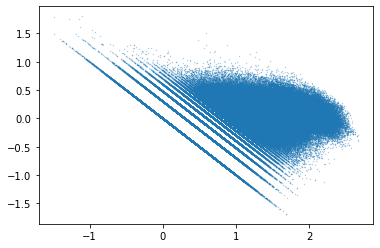

In [45]:
plt.scatter(yhatTrainOLS, dfRegTrain['log10(BikeCount)']-yhatTrainOLS,s=0.1,alpha=0.5)
# plt.scatter(np.power(10, yhatTrainOLS), dfRegTrain['BikeCount'],s=0.1,alpha=0.5)

In [51]:
# Possion regression
poissonTrain = sm.GLM(dfRegTrain['BikeCount'], genRegX(dfRegTrain), 
                      family=sm.families.Poisson()).fit()
print(poissonTrain.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              BikeCount   No. Observations:               398058
Model:                            GLM   Df Residuals:                   397897
Model Family:                 Poisson   Df Model:                          160
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3483e+06
Date:                Sun, 22 Nov 2020   Deviance:                   2.9657e+06
Time:                        16:30:24   Pearson chi2:                 3.17e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

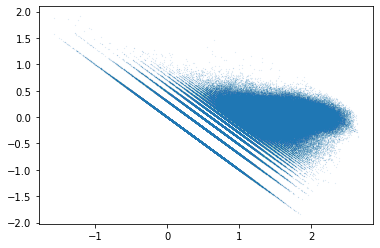

In [54]:
yhatTrainPoisson, yhatTestPoisson = poissonTrain.predict(genRegX(dfRegTrain)), poissonTrain.predict(genRegX(dfRegTest))
# plt.scatter(yhatTrainPossion, dfRegTrain['BikeCount'])

plt.scatter(np.log10(yhatTrainPoisson), np.log10(dfRegTrain['BikeCount'])-np.log10(yhatTrainPoisson),s=0.01,alpha=0.5)
# possionTrain.predict()

In [55]:
## Random Forest


from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor() #max_depth=30, random_state=0
regr.fit(genRegX(dfRegTrain), dfRegTrain[yCol])
regr.score(genRegX(dfRegTrain), dfRegTrain[yCol], sample_weight=None)


/Users/graceli/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.971341419393943

In [56]:
regr.score(genRegX(dfRegTest), dfRegTest[yCol], sample_weight=None)

0.8411343629726957

In [57]:

yhat = regr.predict(genRegX(dfRegTest))
print("Test data. MSE %.4f, R^2 %.5f" % 
      ( mse(yhat, dfRegTest[yCol]), R2(yhat, dfRegTest[yCol])) )


Test data. MSE 0.0673, R^2 0.84113


In [58]:
regr2 = RandomForestRegressor(max_depth=50, random_state=0) #max_depth=30, random_state=0
regr2.fit(genRegX(dfRegTrain), dfRegTrain[yCol])
regr2.score(genRegX(dfRegTrain), dfRegTrain[yCol], sample_weight=None)

/Users/graceli/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8674119859764944

In [59]:
yhat = regr2.predict(genRegX(dfRegTest))
print("Test data. MSE %.4f, R^2 %.5f" % 
      ( mse(yhat, dfRegTest[yCol]), R2(yhat, dfRegTest[yCol])) )


Test data. MSE 0.0906, R^2 0.78636


In [ ]:
residual = dfRegTrain[yCol]-yhatTrainOLS
Xcol = 'temp'
Xval = dfRegTrain[Xcol] * dfRegNumericalColStd[Xcol] + dfRegNumericalColMean[Xcol]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(Xval, dfRegTrain[yCol], s=0.1,alpha=0.5)
plt.xlabel(Xcol);  plt.ylabel(yCol)

plt.subplot(1,2,2)
plt.scatter(Xval, residual + olsTrain.params[Xcol] * dfRegTrain[Xcol], 
            s=0.1,alpha=0.5)
plt.plot( [Xval.min(), Xval.max()], 
         [olsTrain.params[Xcol] * dfRegTrain[Xcol].min(), 
          olsTrain.params[Xcol] * dfRegTrain[Xcol].max()], color='red' )
plt.xlabel(Xcol);  plt.ylabel('Partial residual of %s' % yCol)
plt.show()

In [ ]:
plt.scatter(yhatTrainOLS, dfRegTrain[yCol]-yhatTrainOLS,s=0.1,alpha=0.5)

In [ ]:
len(df1_citi['Zipcode'].unique())

In [ ]:
df1_citi.loc[df1_citi['Zipcode']=='99999',:]

In [ ]:
74*24*361

In [ ]:
len(df1_citi)